Project
----
Determining the species of Iris based on sepal and petal sizes

**File:**
Iris.csv

**Original Data Source: **
The Iris dataset was used in Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems. (quote from Kaggle.com)

**Columns:**
* Id - sequential number by row
* SepalLengthCm	- length of the sepal
* SepalWidthCm - width of the sepal 
* PetalLengthCm	- length of the petal
* PetalWidthCm - width of the petal
* Species - what we want to predict

For those who aren't well versed in botany, sepals are the green parts that sort of look like petals and either wrap around or fan out beneath the petals.

**Data Loading**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

iris = pd.read_csv("Iris.csv")
print(iris.dtypes)
iris.head(5)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Exploration, Part 1**

Let's take a look at cross-plots of the variables to see how the species cluster.

Unique Species Names in the Dataset
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Number of Data Points For Each Species
Setosa:     50
Versicolor: 50
Virginica:  50


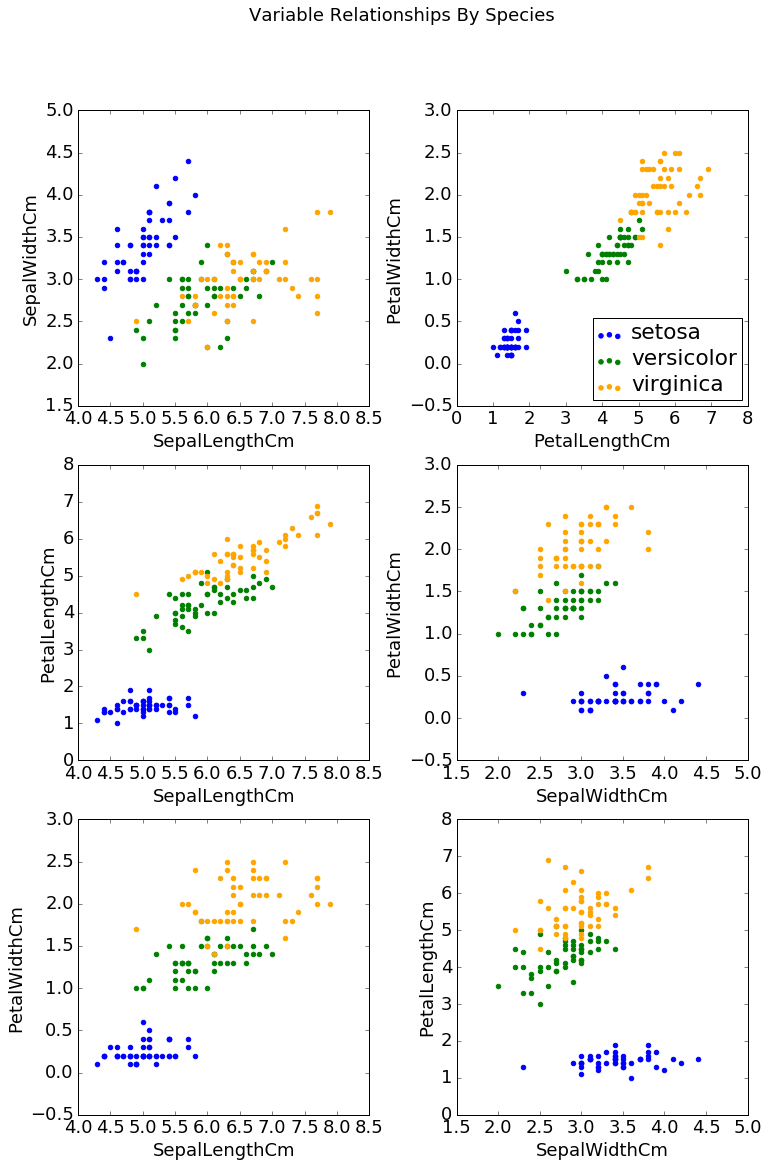

In [2]:
species_unique = iris['Species'].unique()
print("Unique Species Names in the Dataset")
print(species_unique)
print("\n")

setosa = iris.loc[iris['Species']=='Iris-setosa']
versicolor = iris.loc[iris['Species']=='Iris-versicolor']
virginica = iris.loc[iris['Species']=='Iris-virginica']

print("Number of Data Points For Each Species")
print("Setosa:     {0}".format(len(setosa)))
print("Versicolor: {0}".format(len(versicolor)))
print("Virginica:  {0}".format(len(virginica)))

scatter_pairs = [["SepalLengthCm","SepalWidthCm"],["PetalLengthCm","PetalWidthCm"],\
                 ["SepalLengthCm","PetalLengthCm"],["SepalWidthCm","PetalWidthCm"],\
                 ["SepalLengthCm","PetalWidthCm"],["SepalWidthCm","PetalLengthCm"]]

def scatter_plots(scatter_pairs,tile_size,cols):
    setosa = iris.loc[iris['Species']=='Iris-setosa']
    versicolor = iris.loc[iris['Species']=='Iris-versicolor']
    virginica = iris.loc[iris['Species']=='Iris-virginica']

    l = len(scatter_pairs)
    n = cols
    m = math.ceil(l/n)
    tile = tile_size

    fig = plt.figure(figsize=(tile*n,tile*m))
    for i,pair in enumerate(scatter_pairs):
        ax = fig.add_subplot(m,n,i+1)
        ax.scatter(setosa[pair[0]],setosa[pair[1]],color="blue",label="setosa")
        ax.scatter(versicolor[pair[0]],versicolor[pair[1]],color="green",label="versicolor")
        ax.scatter(virginica[pair[0]],virginica[pair[1]],color="orange",label="virginica")
        ax.set_xlabel(pair[0])
        ax.set_ylabel(pair[1])
        if i == 1:
            ax.legend(loc="lower right")

    font = {'size':18}
    plt.rc('font',**font)
    fig.subplots_adjust(wspace=0.3)
    fig.suptitle("Variable Relationships By Species")
    plt.show()

scatter_plots(scatter_pairs,6,2)

**Discussion:** Based on the scatterplots shown above, all three iris species have unique sets of traits. The setosas are distinct and the properties don't overlap with the other two species. The versicolors and the virginicas tend to have some property overlap, but they still clearly occupy separate regions on the scatter plots.

**Data Exploration, Part 2**

Let's see if any one of the ratios shows a clear separation of all three species

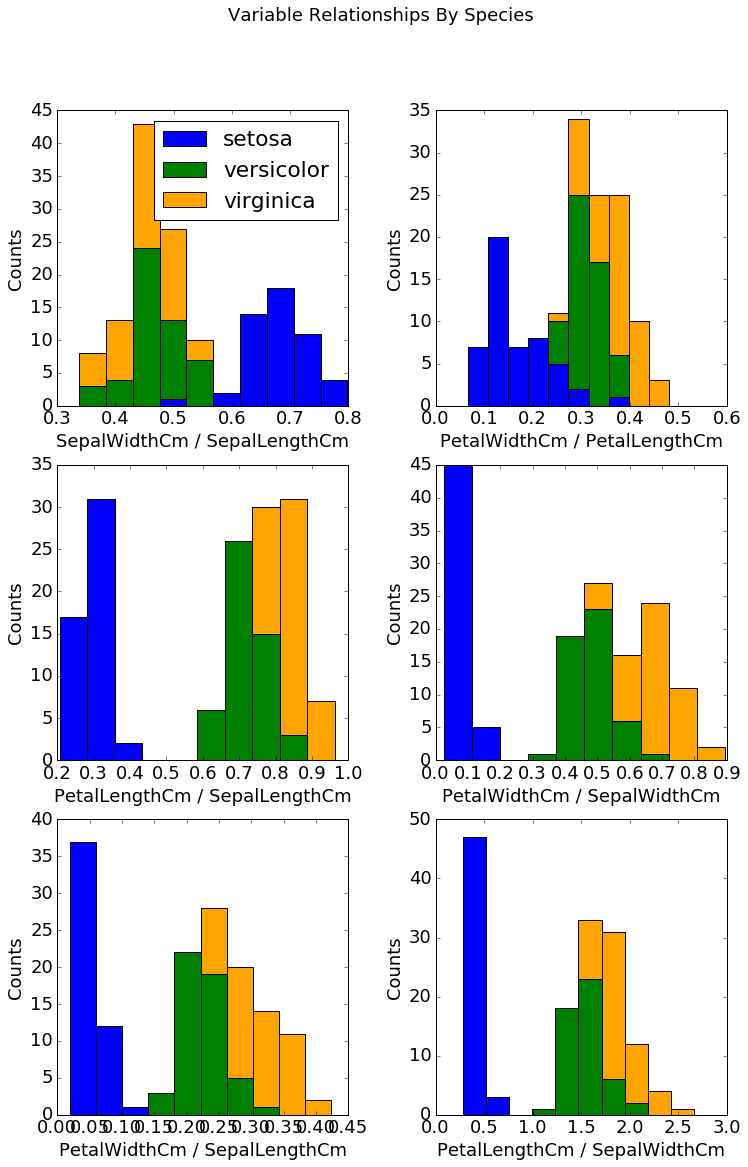

In [48]:
hist_pairs = [["SepalLengthCm","SepalWidthCm"],["PetalLengthCm","PetalWidthCm"],\
                 ["SepalLengthCm","PetalLengthCm"],["SepalWidthCm","PetalWidthCm"],\
                 ["SepalLengthCm","PetalWidthCm"],["SepalWidthCm","PetalLengthCm"]]

def ratio_hists(hist_pairs,tile_size,cols):
    setosa = iris.loc[iris['Species']=='Iris-setosa']
    versicolor = iris.loc[iris['Species']=='Iris-versicolor']
    virginica = iris.loc[iris['Species']=='Iris-virginica']

    l = len(hist_pairs)
    n = cols
    m = math.ceil(l/n)
    tile = tile_size

    fig = plt.figure(figsize=(tile*n,tile*m))
    for i,pair in enumerate(hist_pairs):
        setosa_r = setosa[pair[1]] / setosa[pair[0]]
        versicolor_r = versicolor[pair[1]] / versicolor[pair[0]]
        virginica_r = virginica[pair[1]] / virginica[pair[0]]
        setosa_rmax = setosa_r.max()
        setosa_rmin = setosa_r.min()
        versicolor_rmax = versicolor_r.max()
        versicolor_rmin = versicolor_r.min()
        virginica_rmax = virginica_r.max()
        virginica_rmin = virginica_r.min()
        min_val = min(setosa_rmin, versicolor_rmin, virginica_rmin)
        max_val = max(setosa_rmax, versicolor_rmax, virginica_rmax) + 0.01
        steps = 10
        step_size = (max_val - min_val)/float(steps)
        bins = np.arange(min_val,max_val+step_size,step_size)
        setosa_hist = []
        versicolor_hist = []
        virginica_hist = []
        for b in range(len(bins)-1):
            setosa_ct = len(setosa_r.loc[(setosa_r >= bins[b]) & (setosa_r < bins[b+1])])
            versicolor_ct = len(versicolor_r.loc[(versicolor_r >= bins[b]) & (versicolor_r < bins[b+1])])
            virginica_ct = len(virginica_r.loc[(virginica_r >= bins[b]) & (virginica_r < bins[b+1])])
            setosa_hist.append(setosa_ct)
            versicolor_hist.append(versicolor_ct)
            virginica_hist.append(virginica_ct)
        
        ax = fig.add_subplot(m,n,i+1)
        ax.bar(bins[0:len(bins)-1],setosa_hist,color="blue",label="setosa",width=step_size)
        ax.bar(bins[0:len(bins)-1],versicolor_hist,color="green",label="versicolor",width=step_size,bottom=setosa_hist)
        ax.bar(bins[0:len(bins)-1],virginica_hist,color="orange",label="virginica",width=step_size,\
               bottom=[a+b for a,b in zip(setosa_hist,versicolor_hist)])
        ax.set_xlabel("{0} / {1}".format(pair[1],pair[0]))
        ax.set_ylabel("Counts")
        if i == 0:
            ax.legend(loc="upper right")

    font = {'size':18}
    plt.rc('font',**font)
    fig.subplots_adjust(wspace=0.3)
    fig.suptitle("Variable Relationships By Species")
    plt.show()

ratio_hists(hist_pairs,6,2)

**Data Simplification, Part 1**

The petal length and width data show a strong linear trend, and all species fall on it. Although the species cluster in different regions along the trend, they all seem to fall on the same line. That tells us that petal length and width don't have much independence, and we don't want to use both values for predictions. Instead, we can collapse the 2D data into a 1D vector, petal size, where the value is the distance along the regression line from its origin.

Slope: 0.4164191322854012, Intercept: -0.3665140452167275


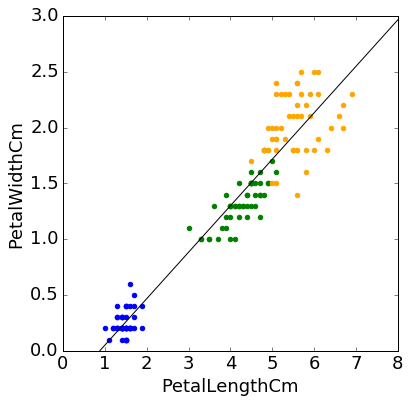

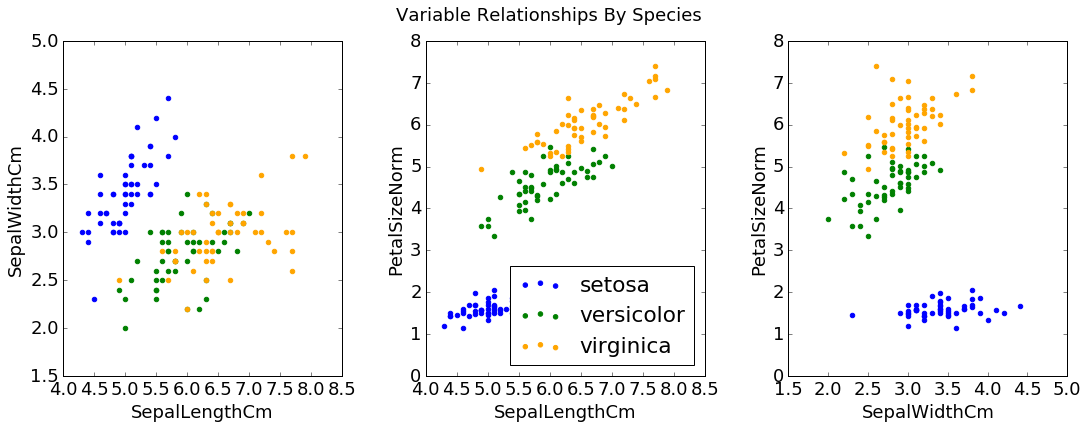

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(iris["PetalLengthCm"].reshape(-1,1),iris["PetalWidthCm"])
m = lr.coef_[0]
b = lr.intercept_
print("Slope: {0}, Intercept: {1}".format(m,b))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(setosa["PetalLengthCm"],setosa["PetalWidthCm"],color="blue",label="setosa")
ax.scatter(versicolor["PetalLengthCm"],versicolor["PetalWidthCm"],color="green",label="versicolor")
ax.scatter(virginica["PetalLengthCm"],virginica["PetalWidthCm"],color="orange",label="virginica")
x_reg = [x for x in range(0,9)]
y_reg = [m*x+b for x in x_reg]
ax.plot(x_reg,y_reg,color="black",label="regression")
ax.set_xlabel("PetalLengthCm")
ax.set_ylabel("PetalWidthCm")
ax.set_xlim([0,8])
ax.set_ylim([0,3])
plt.show()

# To collapse the data into 1D, we need to project each point to the regression line
# The way to do that is find the line that is perpendicular to the regression line and 
# that runs through the point to be projected. The projected point is the intersection 
# between the new perpendicular line and the original regression line
# 
# xo,yo = original point
# xp,yp = projected point
# yp = m*xp + b  [original regression line]
# yp = (-1/m)*(xp - xo) + yo  [new perpendicular line]
# To solve:
# xp = ((1/m)*xo + yo - b) / (m + (1/m))

def norm_petal(row):
    xo = row["PetalLengthCm"]
    yo = row["PetalWidthCm"]
    xp = ((1/m)*xo + yo - b) / (m + (1/m))
    yp = m*xp + b
    dist = ((xp-0)**2 + (yp-b)**2)**(1/2)
    return dist

iris["PetalSizeNorm"] = iris.apply(norm_petal,axis=1)

scatter_pairs = [["SepalLengthCm","SepalWidthCm"],["SepalLengthCm","PetalSizeNorm"],["SepalWidthCm","PetalSizeNorm"]]
scatter_plots(scatter_pairs,6,3)

**Discussion:** Using a collapsed petal size does not appear to negatively affect the clustering on the scatter plots (much), so we'll keep that parameter. Theoretically, the regression relationship cannot be valid, because a petal cannot have 0 width and finite length (as predicted by the line), but over the range of values observed, the linear relationship appears reasonable.

**Data Simplification, Pt 2**

The next features we want to look at are the sepal length and width. Based on a look at the scatter plot, it may be possible to collapse these two variables into a ratio of some kind.

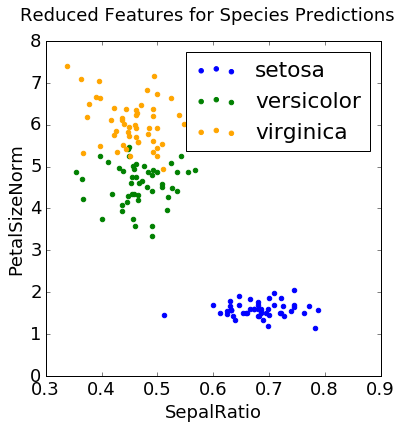

In [30]:
iris["SepalRatio"] = iris["SepalWidthCm"] / iris["SepalLengthCm"]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
setosa = iris.loc[iris['Species']=='Iris-setosa']
versicolor = iris.loc[iris['Species']=='Iris-versicolor']
virginica = iris.loc[iris['Species']=='Iris-virginica']
ax.scatter(setosa["SepalRatio"],setosa["PetalSizeNorm"],color="blue",label="setosa")
ax.scatter(versicolor["SepalRatio"],versicolor["PetalSizeNorm"],color="green",label="versicolor")
ax.scatter(virginica["SepalRatio"],virginica["PetalSizeNorm"],color="orange",label="virginica")
ax.set_xlabel("SepalRatio")
ax.set_ylabel("PetalSizeNorm")
ax.legend(loc="upper right")
fig.suptitle("Reduced Features for Species Predictions")
plt.show()

**Discussion:** It looks like there are several options for predicting the iris species here, and we'll test the accuracy of each method:

* PetalSizeNorm
* PetalSizeNorm + SepalRatio
* PetalSizeNorm + SepalWidthCm + SepalLengthCm
* PetalWidthCm + PetalLengthCm + SepalWidthCm + SepalLengthCm

In addition to the ratios and transformations shown above, we have the option to try non-linear transformations and normalizations. For now, we'll stick with the simple set of features that we've shown above and see how they perform

**Logistic Regression Modelling, Full Data Set**

First, lets try logistic regression modelling on the full data set to see how accurate of a prediction we can get. We don't want to use this approach for actual model predictions (we'll want training and test sets), but it's a good place to start evaluating model strengths.

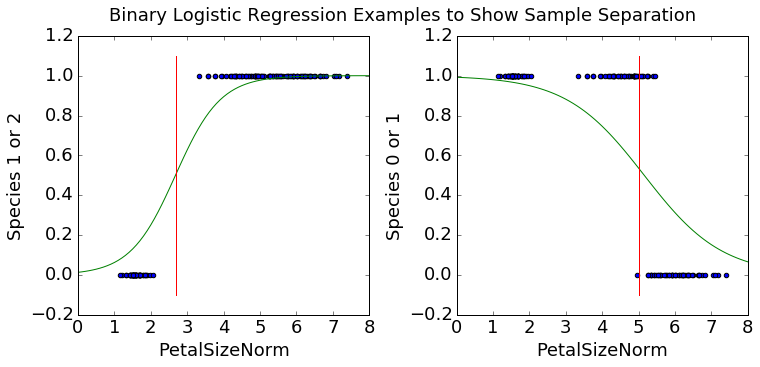

Accuracies of Logistic Models 

Feature Set: ['PetalSizeNorm']
Accuracy: 0.81
Feature Set: ['PetalSizeNorm', 'SepalRatio']
Accuracy: 0.83
Feature Set: ['PetalSizeNorm', 'SepalWidthCm', 'SepalLengthCm']
Accuracy: 0.95
Feature Set: ['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm', 'SepalLengthCm']
Accuracy: 0.96


In [43]:
from sklearn.linear_model import LogisticRegression

def species_num(row):
    if row["Species"] == "Iris-setosa":
        return 0
    elif row["Species"] == "Iris-versicolor":
        return 1
    else:
        return 2
    
def is_species(row, num):
    if row["SpeciesNum"] == num:
        return 1
    else:
        return 0

iris["SpeciesNum"] = iris.apply(species_num, axis=1)
iris["Species0"] = iris.apply(lambda x: is_species(x,0), axis=1)
iris["Species1"] = iris.apply(lambda x: is_species(x,1), axis=1)
iris["Species2"] = iris.apply(lambda x: is_species(x,2), axis=1)
iris["Species0or1"] = iris["Species0"] + iris["Species1"]
iris["Species1or2"] = iris["Species1"] + iris["Species2"]

logistic_model = LogisticRegression()
logistic_model.fit(iris[["PetalSizeNorm"]], iris["Species1or2"])
pred_probs = logistic_model.predict_proba(iris[["PetalSizeNorm"]])
fitted_labels = logistic_model.predict(iris[["PetalSizeNorm"]])
line_x = [[i/10] for i in range(0,90)]
prob_x = logistic_model.predict_proba(line_x)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(iris["PetalSizeNorm"],iris["Species1or2"])
ax1.plot(line_x,prob_x[:,1],color="green")
ax1.set_xlabel("PetalSizeNorm")
ax1.set_ylabel("Species 1 or 2")
ax1.set_xlim([0,8])
ax1.plot([2.7,2.7],[-0.1,1.1],color="red")

logistic_model.fit(iris[["PetalSizeNorm"]], iris["Species0or1"])
pred_probs = logistic_model.predict_proba(iris[["PetalSizeNorm"]])
fitted_labels = logistic_model.predict(iris[["PetalSizeNorm"]])
line_x = [[i/10] for i in range(0,90)]
prob_x = logistic_model.predict_proba(line_x)

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(iris["PetalSizeNorm"],iris["Species0or1"])
ax2.plot(line_x,prob_x[:,1],color="green")
ax2.set_xlabel("PetalSizeNorm")
ax2.set_ylabel("Species 0 or 1")
ax2.set_xlim([0,8])
ax2.plot([5.0,5.0],[-0.1,1.1],color="red")
fig.subplots_adjust(wspace=0.3)
fig.suptitle("Binary Logistic Regression Examples to Show Sample Separation")
plt.show()


logistic_sets = [["PetalSizeNorm"],\
                 ["PetalSizeNorm","SepalRatio"],\
                 ["PetalSizeNorm","SepalWidthCm","SepalLengthCm"],\
                 ["PetalWidthCm","PetalLengthCm","SepalWidthCm","SepalLengthCm"]]

print("Accuracies of Logistic Models","\n")
accuracies = []
for lset in logistic_sets:
    logistic_model.fit(iris[lset], iris["SpeciesNum"])
    fitted_labels = logistic_model.predict(iris[lset])
    correct = sum(iris["SpeciesNum"] == fitted_labels)
    total = len(fitted_labels)
    accuracy = correct / total
    accuracies.append(accuracy)
    print("Feature Set: {0}".format(lset))
    print("Accuracy: {0:.2f}".format(accuracy))

**Discussion:** Using logistic regression, we can see that the separation between species 0 (setosa) and the rest is complete and even a simple one feature model can have 100% accuracy. Separating species 1 and 2 (versicolor and virginica) is more difficult. The overall accuracy is only 81% using "PetalSizeNorm", but that number is as high as it is in part because the model gets all of the setosas correctly identified. Adding "SepalRatio" does very little to improve prediction, as you might guess by looking at the cross-plot. However, it turns out that SepalWidthCm and SepalLengthCm contained more information that we might initially suspect. Separating those two variables gives us an accuracy boost to 95%. Separating "PetalWidthCm" and "PetalLengthCm" doesn't add any additional information. Based on these results, we might conclude that our three features for modelling should be "PetalSizeNorm", "SepalWidthCm", and "SepalLengthCm".

Let's test the accuracy of our model using split data sets, which is how we'd need to validate the model for production.

**Logistic Regression Modelling, Training and Test Sets**

We can now see how robust our model is by comparing the accuracies of different test sets. For this exercise, we'll use KFold cross validation. We don't have enough data points to warrant keeping training and test sets fully separate, so KFold validation allows us to subsample our data and run training vs test splits quickly.

In [51]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

kf = KFold(len(iris), 5, shuffle=True, random_state=8)
lr = LogisticRegression()
X = iris[["PetalSizeNorm", "SepalWidthCm", "SepalLengthCm"]]
y = iris["SpeciesNum"]
accuracies = cross_val_score(lr, X, y, scoring=None, cv=kf)
average_accuracy = np.mean(accuracies)

print("Accuracy for Each Fold","\n")
print(accuracies,"\n")
print("Average Test Accuracy")
print(average_accuracy)

Accuracy for Each Fold 

[ 0.96666667  0.96666667  0.96666667  0.96666667  0.9       ] 

Average Test Accuracy
0.953333333333


**Discussion:** It looks like our three-feature logistic regression model holds up well and doesn't overfit. The accuracies of the test sets are similar to the accuracy for the entire data set.

**Decision Tree Modelling, Full Data Set**

Next, let's try to apply decision tree models to see if we can improve the predictions. We'll start with fitting and testing the models on the full data set (to explore parameters), and then once we've identified the method we'd like to use, we'll check the model against training and test sets again.

In [60]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1,max_depth=5,min_samples_split=10)

feature_sets = [["PetalSizeNorm"],\
                 ["PetalSizeNorm","SepalRatio"],\
                 ["PetalSizeNorm","SepalWidthCm","SepalLengthCm"],\
                 ["PetalWidthCm","PetalLengthCm","SepalWidthCm","SepalLengthCm"]]

print("Accuracies of Decision Tree Models","\n")
accuracies = []
for fset in feature_sets:
    X = iris[fset]
    y = iris["SpeciesNum"]
    clf.fit(X, y)
    predictions = clf.predict(X)
    correct = sum(iris["SpeciesNum"] == predictions)
    total = len(fitted_labels)
    accuracy = correct / total
    print("Feature Set: {0}".format(fset))
    print("Accuracy: {0:.2f}".format(accuracy))
    print("Feature Importances: {0}".format(clf.feature_importances_))

Accuracies of Decision Tree Models 

Feature Set: ['PetalSizeNorm']
Accuracy: 0.98
Feature Importances: [ 1.]
Feature Set: ['PetalSizeNorm', 'SepalRatio']
Accuracy: 0.98
Feature Importances: [ 0.9885514  0.0114486]
Feature Set: ['PetalSizeNorm', 'SepalWidthCm', 'SepalLengthCm']
Accuracy: 0.98
Feature Importances: [ 0.97865006  0.          0.02134994]
Feature Set: ['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm', 'SepalLengthCm']
Accuracy: 0.98
Feature Importances: [ 0.4263306  0.5736694  0.         0.       ]


**Discussion:** You can see from the results that decision trees provide a more accurate classification using fewer features. ~98% accuracy is achieved when just using one feature, the "PetalSizeNorm", and the accuracy doesn't improve noticeably by the addition of extra features. You can see that the importances of the additional features remains miniscule until "PetalSizeNorm" is broken into "PetalLengthCm" and "PetalWidthCm". Remember that we got 81% accuracy using logistic regression when we only considered "PetalSizeNorm" and we only achieved a maximum accuracy of 95% when additional features were added. 

We should be cautious, however, because decision trees are much more arbitrary than logistic regression curves. The cutoffs are tuned to the specific dataset and they may generalize very poorly. Decision trees constructed using automated methods may have no logical basis and in fact may be completely counter to known physical mechanisms. Logistic regression is more robust conceptually, if not necessarily more accurate.

Let's test the accuracy of the decision tree approach using RandomForests.

**Decision Tree Modelling Using Random Forests, Training and Test Sets**

In [61]:
from sklearn.ensemble import RandomForestClassifier

kf = KFold(len(iris), 5, shuffle=True, random_state=8)
clf = RandomForestClassifier(n_estimators=5, random_state=1, min_samples_leaf=2)

X = iris[["PetalSizeNorm"]]
y = iris["SpeciesNum"]
accuracies = cross_val_score(clf, X, y, scoring=None, cv=kf)
average_accuracy = np.mean(accuracies)

print("KFOLD CROSS VALIDATION: RANDOM FORESTS", "\n")
print("Features: [PetalSizeNorm]")
print("Accuracy for Each Fold","\n")
print(accuracies,"\n")
print("Average Test Accuracy")
print(average_accuracy)
print("\n")

X = iris[["PetalSizeNorm", "SepalWidthCm", "SepalLengthCm"]]
y = iris["SpeciesNum"]
accuracies = cross_val_score(clf, X, y, scoring=None, cv=kf)
average_accuracy = np.mean(accuracies)

print("Features: [PetalSizeNorm, SepalWidthCm, SepalLengthCm]")
print("Accuracy for Each Fold","\n")
print(accuracies,"\n")
print("Average Test Accuracy")
print(average_accuracy)

KFOLD CROSS VALIDATION: RANDOM FORESTS 

Features: [PetalSizeNorm]
Accuracy for Each Fold 

[ 0.93333333  0.96666667  0.93333333  1.          0.96666667] 

Average Test Accuracy
0.96


Features: [PetalSizeNorm, SepalWidthCm, SepalLengthCm]
Accuracy for Each Fold 

[ 0.93333333  0.9         0.93333333  1.          0.83333333] 

Average Test Accuracy
0.92


**Discussion:** In this section, we used Random Forests to generate 5 different decision trees per training and test set pair. The tree predictions were then merged to generate a single predicted outcome. This is meant to help reduce some of the arbitrary behavior of computer-constructed decision trees. On top of that, we used KFold cross-validation to generate different training and test sets so we could observe the impact of overfitting and get a better idea of how our model(s) would perform on new data.

The first thing that's worth noting is how these accuracies compare to the accuracies generated using a single model (per feature set) from the full data set. For a given feature set, KFold random forest models give us lower accuracy. This is to be expected, because the models would be overfit on the full data set. Second, you can see that the accuracy *drops* with the addition of the "SepalWidthCm" and "SepalLengthCm". The results from each fold seem to indicate that the decision trees are being poorly conditioned from some of the random data subsets. On the contrary, when only "PetalSizeNorm" is used, the accuracy remains high for all test subsets. That suggests that, if decision tree approach was to be used, we'd prefer to only using one feature: "PetalSizeNorm".

**Conclusions:** In this exercise, we attempted to come up with models that can predict the species of iris (setosa, versicolor, and virginica) based on petal and sepal sizes. We had four features at our disposal, but we were able to reduce some of the degrees of freedom by transforming sets of related variables.

We compared two main approaches. First, we fit logistic regression models. We initially tested our models on the full data set and we then used KFold cross-validation to determine the robustness of the approach. Using only a single, transformed parameter - PetalSizeNorm - we achieved an accuracy of ~81%. When we added SepalLengthCm and SepalWidthCm, we boosted our accuracy to ~95%, and the accuracy remained >90% for all KFold tests.

Second, we constructed decision tree models. We initially built one tree per feature set on the full data set, and we then used random forests (5 tree per feature set) and KFold cross-validation to determine the robustness of the approach. In contrast to what we saw with logistic regression, our accuracy remained high (98%) for all sets and subsets of features on the original data set. When random forests and KFolds validation were used, our accuracy went *down* and became less predictable when more features were added. We achieved a relatively stable ~96% accuracy (with all folds >93%) just by considering one feature - PetalSizeNorm.

In general, decision trees - particularly those that are automatically generated from lots of features - are harder to reason about and apply to new data. However, in this case, the most robust model was built using a decision tree for a single parameter. That means the model would be easy to tune by hand and explain if necessary. My recommendation is to use the PetalSizeNorm, along with simple value cutoffs, to predict the species of iris.

There are additional data transformation and modelling steps that can be taken, and some may improve the accuracy, but we found a very simple classifier model using one easy-to-explain and easy-to-reason-about feature. So, for now, we'll stop right here.